## *Exploring the mean differences for subjects whitin tasks*

* First extract the mean alpha power for each subject in each condition
* Calculate the difference between corresponding tasks and states
* print out the difference

In [ ]:
from eeg_analyzer.dataset import Dataset
from utils.config import DATASETS

dataset_config = DATASETS['braboszcz2017']
dataset = Dataset(dataset_config)
dataset.load_subjects()

session_id = 1

# Extract the mean alpha power for each subject in each state (also within channel)
alpha_powers = dataset.get_mean_alpha_diff_by_state(session_id)

for subj_id, alpha_power in alpha_powers.items():
    print(f"Subject ID: {subj_id}, Alpha Power Difference: {alpha_power}")


Subject ID: 025, Alpha Power Difference: [  -7.31027381   -6.34097994   -7.84613859   -9.01094821   -8.73549093
   -6.64098906   -5.41595244   -3.08141673   -5.19482938   -8.87337241
  -11.4018805    -9.23231572   -3.84601774   -1.02247694   -2.22724463
   -3.0188401     3.40452928    3.51831532   -0.40095292   -5.28926362
  -14.54526548  -17.93201727  -30.33902804  -43.3596296  -102.50215737
  -72.98278556 -130.44938882  -44.1761431   -54.19244125  -24.16059358
   -0.26473286    1.71093205   -6.55652085   -5.69436808   -7.77345805
   -5.71469948   -7.56954843   -9.72715112   -8.33383503   -7.55709912
   -8.11545907   -9.89727298  -13.98775471   -9.58314739  -10.03640509
  -12.03399864  -12.46759324   -9.14841897   -6.86280655   -1.96927005
   -5.68474882  -17.36649224  -32.17059341   -6.45456848    0.77013665
    1.86187655   -2.39852889  -22.89023402  -60.65975336  -93.35723064
  -93.25513233 -203.96782674  -63.97341828  -61.28443645]
Subject ID: 026, Alpha Power Difference: [ -1.460

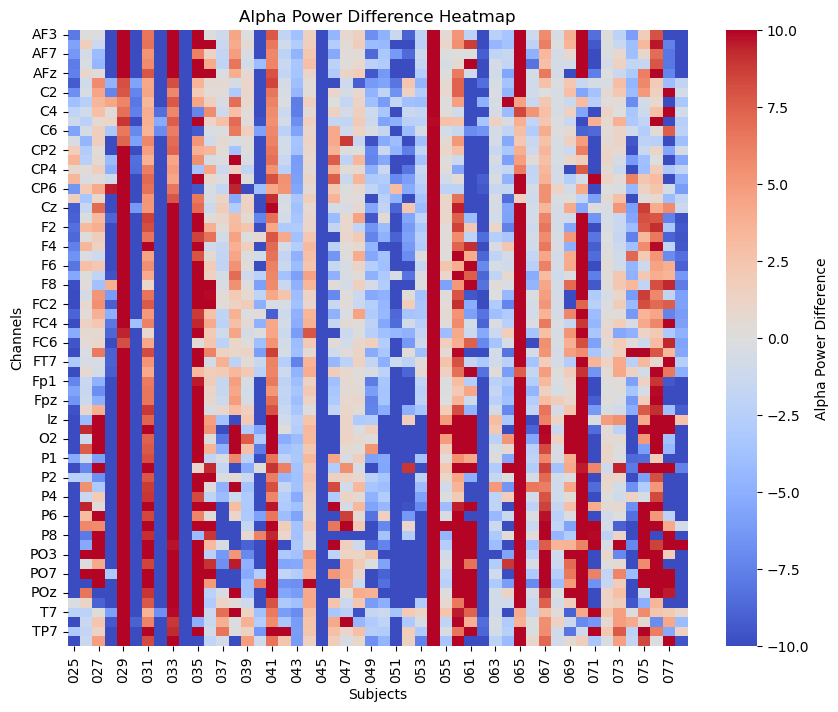

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get channel names
channel_names = dataset.get_channel_names()

# Convert alpha_powers to a DataFrame (no condition)
alpha_df = pd.DataFrame([
    {"Subject": subj_id, "Channel": channel, "AlphaDiff": alpha_diff}
    for subj_id, alpha_diffs in alpha_powers.items()
    for channel, alpha_diff in zip(channel_names, alpha_diffs)
])

# Clip extreme values to mitigate the effect of outliers
clip_threshold = 10  # Define a threshold for clipping
alpha_df["AlphaDiff"] = alpha_df["AlphaDiff"].clip(lower=-clip_threshold, upper=clip_threshold)

# Pivot and plot heatmap
heatmap_data = alpha_df.pivot(index="Channel", columns="Subject", values="AlphaDiff")
plt.figure(figsize=(10, 8))
sns.heatmap(
    data=heatmap_data,
    cmap="coolwarm",
    center=0,
    cbar_kws={'label': 'Alpha Power Difference'}
)
plt.title("Alpha Power Difference Heatmap")
plt.ylabel("Channels")
plt.xlabel("Subjects")
plt.show()
